NIM GENAP = 2702224282

DATASET A_1

#A

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [ ]:
# Load dataset
df = pd.read_csv('AP003.csv')
df.head()

,From Date,To Date,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),...,Temp (degree C),RH (%),WS (m/s),WD (degree),SR (W/mt2),BP (mmHg),VWS (m/s),AT (degree C),RF (mm),Xylene (ug/m3)
0,2017-07-01 00:00:00,2017-07-01 01:00:00,50.00,91.75,3.33,27.70,17.48,NaN,24.35,1.33,...,55.22,83.25,1.67,285.50,6.75,737.0,0.03,26.30,0.00,0.65
1,2017-07-01 01:00:00,2017-07-01 02:00:00,30.75,59.25,1.20,20.78,11.40,0.03,8.23,1.77,...,57.48,84.50,2.50,299.50,6.75,736.0,0.05,25.00,1.50,0.50
2,2017-07-01 02:00:00,2017-07-01 03:00:00,NaN,NaN,1.17,4.07,2.73,0.10,10.77,1.20,...,58.67,86.00,0.77,285.67,6.67,736.0,0.03,24.17,0.33,0.43
3,2017-07-01 03:00:00,2017-07-01 04:00:00,8.00,NaN,2.58,6.38,5.30,NaN,19.78,1.58,...,58.93,86.00,1.55,302.50,6.00,735.0,0.08,24.10,0.00,0.63
4,2017-07-01 04:00:00,2017-07-01 05:00:00,33.25,NaN,5.30,21.03,15.47,0.15,22.40,2.25,...,59.88,86.00,2.30,297.25,6.00,735.0,0.08,24.90,0.00,0.67


## EDA

In [ ]:
df['From Date'] = pd.to_datetime(df['From Date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

 mengonversi kolom 'From Date' menjadi format datetime (tanggal & waktu) untuk analisis lebih lanjut

In [ ]:
df = df.sort_values(by='From Date')

sorting data yang ada di dataset berdasarkan urutan waktu (From Date) untuk menjaga integritas urutan time series sebelum diproses lebih lanjut.

In [ ]:
df.head()

,From Date,To Date,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),...,Temp (degree C),RH (%),WS (m/s),WD (degree),SR (W/mt2),BP (mmHg),VWS (m/s),AT (degree C),RF (mm),Xylene (ug/m3)
0,2017-07-01 00:00:00,2017-07-01 01:00:00,50.00,91.75,3.33,27.70,17.48,NaN,24.35,1.33,...,55.22,83.25,1.67,285.50,6.75,737.0,0.03,26.30,0.00,0.65
1,2017-07-01 01:00:00,2017-07-01 02:00:00,30.75,59.25,1.20,20.78,11.40,0.03,8.23,1.77,...,57.48,84.50,2.50,299.50,6.75,736.0,0.05,25.00,1.50,0.50
2,2017-07-01 02:00:00,2017-07-01 03:00:00,NaN,NaN,1.17,4.07,2.73,0.10,10.77,1.20,...,58.67,86.00,0.77,285.67,6.67,736.0,0.03,24.17,0.33,0.43
3,2017-07-01 03:00:00,2017-07-01 04:00:00,8.00,NaN,2.58,6.38,5.30,NaN,19.78,1.58,...,58.93,86.00,1.55,302.50,6.00,735.0,0.08,24.10,0.00,0.63
4,2017-07-01 04:00:00,2017-07-01 05:00:00,33.25,NaN,5.30,21.03,15.47,0.15,22.40,2.25,...,59.88,86.00,2.30,297.25,6.00,735.0,0.08,24.90,0.00,0.67


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50400 entries, 0 to 50399
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   From Date        50400 non-null  datetime64[ns]
 1   To Date          50400 non-null  object        
 2   PM2.5 (ug/m3)    44691 non-null  float64       
 3   PM10 (ug/m3)     45018 non-null  float64       
 4   NO (ug/m3)       46252 non-null  float64       
 5   NO2 (ug/m3)      45705 non-null  float64       
 6   NOx (ppb)        47040 non-null  float64       
 7   NH3 (ug/m3)      45756 non-null  float64       
 8   SO2 (ug/m3)      43604 non-null  float64       
 9   CO (mg/m3)       46993 non-null  float64       
 10  Ozone (ug/m3)    45309 non-null  float64       
 11  Benzene (ug/m3)  46678 non-null  float64       
 12  Toluene (ug/m3)  46678 non-null  float64       
 13  Temp (degree C)  46335 non-null  float64       
 14  RH (%)           46520 non-null  float

- Dataset berisi 50400 baris dan 23 kolom
- Ada Missing Value di beberapa kolom

Dataset mencakup pengukuran konsentrasi berbagai polutan udara, dengan satuan umum:
- µg/m³ (mikrogram per meter kubik) = untuk PM2.5, PM10, NO, NO₂, dll
- ppb (parts per billion) = untuk NOx
- mg/m³ (miligram per meter kubik) = untuk CO


In [ ]:
df.describe()

,From Date,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),Ozone (ug/m3),...,Temp (degree C),RH (%),WS (m/s),WD (degree),SR (W/mt2),BP (mmHg),VWS (m/s),AT (degree C),RF (mm),Xylene (ug/m3)
count,50400,44691.000000,45018.000000,46252.000000,45705.000000,47040.000000,45756.000000,43604.000000,46993.000000,45309.000000,...,46335.000000,46520.000000,46522.000000,44710.000000,47045.000000,43680.000000,47043.000000,46370.000000,47148.000000,46658.000000
mean,2020-05-15 23:30:00,46.869591,111.938589,14.817678,34.921808,29.857413,13.813287,12.323789,0.666865,29.118732,...,29.408316,73.166650,1.895205,209.078558,127.619004,746.903387,0.017120,27.591552,0.022934,2.649006
min,2017-07-01 00:00:00,0.250000,1.000000,0.030000,0.030000,0.000000,0.020000,0.030000,0.000000,0.100000,...,6.700000,15.750000,0.100000,7.000000,0.000000,700.000000,-0.550000,5.180000,0.000000,0.000000
25%,2018-12-07 23:45:00,23.415000,63.330000,2.915000,18.400000,12.670000,7.050000,6.350000,0.330000,9.930000,...,27.900000,68.000000,0.880000,157.250000,6.250000,743.000000,0.000000,24.830000,0.000000,0.570000
50%,2020-05-15 23:30:00,38.750000,97.750000,6.600000,30.300000,22.910000,11.600000,10.680000,0.590000,17.570000,...,28.850000,74.330000,1.800000,220.000000,8.250000,747.500000,0.000000,27.650000,0.000000,1.300000
75%,2021-10-22 23:15:00,62.330000,137.500000,17.300000,43.900000,36.930000,16.770000,15.520000,0.890000,37.680000,...,30.180000,79.670000,2.730000,262.670000,227.500000,751.000000,0.050000,30.400000,0.000000,2.770000
max,2023-03-31 23:00:00,840.000000,904.000000,419.780000,420.200000,408.250000,454.900000,194.250000,11.280000,199.300000,...,59.880000,92.000000,7.970000,360.000000,730.000000,770.000000,1.680000,48.500000,12.500000,410.850000
std,NaN,35.201161,74.285923,22.372042,23.912796,27.042412,14.685377,10.266289,0.550187,29.388645,...,3.228845,8.592562,1.199727,67.168061,175.790733,7.656193,0.071902,4.426638,0.282441,8.785483


- Suhu (AT): Rata-rata 27.6°C (min 5.18°C, max 48.5°C)

Distribusi cukup wajar untuk suhu udara di daerah tropis/subtropis

- PM2.5: Rata-rata 46.8 µg/m³ (melebihi batas aman WHO: 25 µg/m³)

wilayah cenderung terpolusi

- Kelembaban (RH): Rata-rata 73.1%

menunjukkan iklim yang lembap

kondisi ini berpotensi memengaruhi suhu udara yang dirasakan (AT)

In [ ]:
#Missing Values Analysis
missing_percent = df.isnull().mean() * 100
print(missing_percent.sort_values(ascending=False))

SO2 (ug/m3)        13.484127
BP (mmHg)          13.333333
PM2.5 (ug/m3)      11.327381
WD (degree)        11.289683
PM10 (ug/m3)       10.678571
Ozone (ug/m3)      10.101190
NO2 (ug/m3)         9.315476
NH3 (ug/m3)         9.214286
NO (ug/m3)          8.230159
Temp (degree C)     8.065476
AT (degree C)       7.996032
RH (%)              7.698413
WS (m/s)            7.694444
Xylene (ug/m3)      7.424603
Toluene (ug/m3)     7.384921
Benzene (ug/m3)     7.384921
CO (mg/m3)          6.759921
NOx (ppb)           6.666667
VWS (m/s)           6.660714
SR (W/mt2)          6.656746
RF (mm)             6.452381
From Date           0.000000
To Date             0.000000
dtype: float64


Dataset memiliki beberapa kolom dengan missing value sedang hingga tinggi, terutama pada SO2, BP, dan PM2.5, yang semuanya di atas 10%. Target variabel AT sendiri memiliki 8% data hilang, yang masih tergolong moderat. Kolom waktu (From Date, To Date) lengkap sepenuhnya. Sebagian besar kolom lainnya memiliki tingkat missing <10%

In [ ]:
# Analisis Temporal
df['Hour'] = df['From Date'].dt.hour
df['Day'] = df['From Date'].dt.day
df['Month'] = df['From Date'].dt.month

Memisahkan komponen waktu (jam, hari, bulan) ke kolom tersendiri, supaya bisa dilakukan analisis lebih lanjut berdasarkan waktu.

In [ ]:
#Analisis Variabel Target (AT)
print(df['AT (degree C)'].describe())

count    46370.000000
mean        27.591552
std          4.426638
min          5.180000
25%         24.830000
50%         27.650000
75%         30.400000
max         48.500000
Name: AT (degree C), dtype: float64


Kolom AT (degree C) memiliki nilai yang tersebar antara 5.18°C hingga 48.5°C, dengan nilai rata-rata sekitar 27.6°C. Distribusinya cenderung simetris, tapi ada kemungkinan outlier di kedua ujung distribusi, jadi butuh analisis lebih lanjut

In [ ]:
#Korelasi antar Variabel
correlation_matrix = df.corr(numeric_only=True)
print(correlation_matrix['AT (degree C)'].sort_values(ascending=False))

AT (degree C)      1.000000
SR (W/mt2)         0.563218
WS (m/s)           0.406985
Hour               0.186894
Temp (degree C)    0.159561
NH3 (ug/m3)        0.066156
WD (degree)        0.062592
Day                0.037977
SO2 (ug/m3)        0.007714
Xylene (ug/m3)    -0.000222
Month             -0.014789
RF (mm)           -0.058868
Toluene (ug/m3)   -0.084636
VWS (m/s)         -0.090903
Ozone (ug/m3)     -0.097760
Benzene (ug/m3)   -0.153043
CO (mg/m3)        -0.217473
PM10 (ug/m3)      -0.251994
NO (ug/m3)        -0.277690
NO2 (ug/m3)       -0.280964
NOx (ppb)         -0.310512
BP (mmHg)         -0.335655
PM2.5 (ug/m3)     -0.349828
RH (%)            -0.395892
Name: AT (degree C), dtype: float64


Korelasi menunjukkan bahwa AT (degree C) paling dipengaruhi secara positif oleh radiasi matahari (SR) dan kecepatan angin (WS), serta secara negatif oleh kelembaban (RH) dan polusi partikulat (PM2.5). Fitur waktu seperti Hour juga memiliki dampak ke kolom AT. Sebaliknya, beberapa variabel seperti Xylene, Month, dan RF memiliki korelasi sangat rendah dan kemungkinan kurang penting untuk analisis lebih lanjut.

Text(0.5, 1.0, 'Distribusi Suhu (AT)')

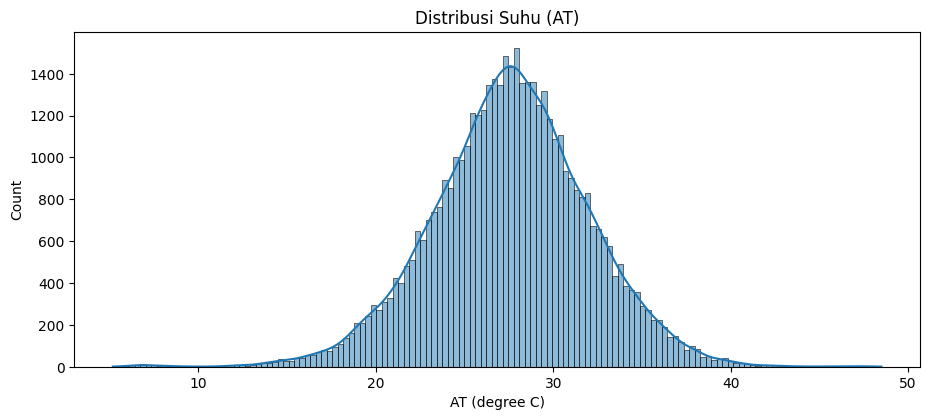

In [ ]:
# Visualisasi
plt.figure(figsize=(24, 20))
# 1. Distribusi Variabel Target
plt.subplot(4, 2, 1)
sns.histplot(df['AT (degree C)'], kde=True)
plt.title('Distribusi Suhu (AT)')

Distribusi suhu udara AT (degree C) menunjukkan pola yang hampir normal dengan puncak di sekitar 28°C. Sebagian besar data berada dalam kisaran 20–35°C, yang menunjukkan bahwa suhu udara pada umumnya stabil. Namun, terdapat beberapa nilai ekstrem di bawah 10°C dan di atas 40°C

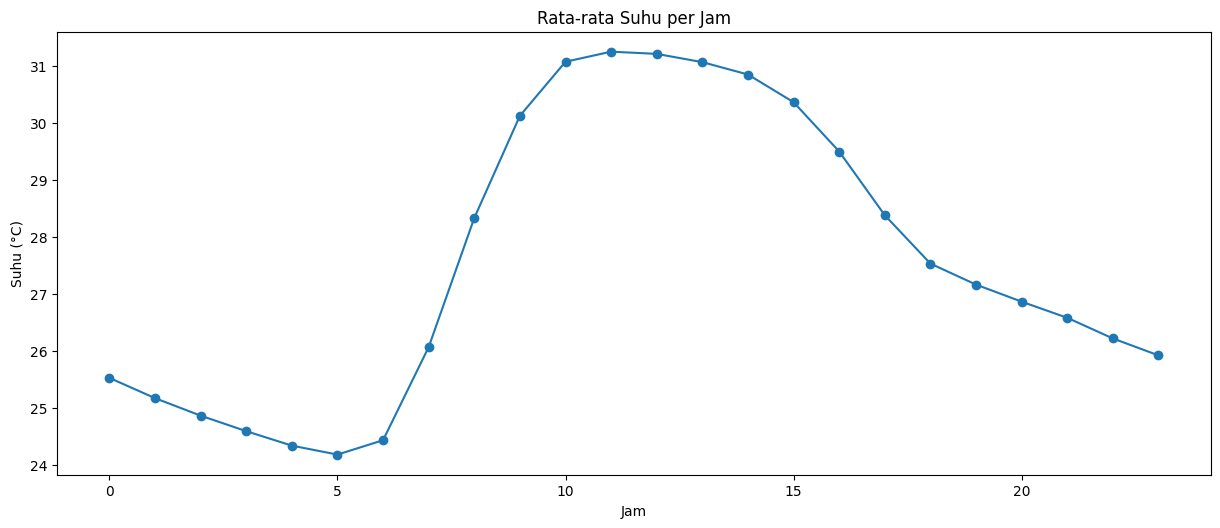

In [ ]:
plt.figure(figsize=(24, 20))

plt.subplot(4, 2, 2)
hourly_avg = df.groupby('Hour')['AT (degree C)'].mean()
hourly_avg.plot(marker='o')
plt.title('Rata-rata Suhu per Jam')
plt.ylabel('Suhu (°C)')
plt.xlabel('Jam')

plt.tight_layout()
plt.show()


pola suhu harian yang khas, di mana suhu mencapai titik terendah pada dini hari (5 pagi), lalu meningkat tajam seiring matahari terbit, dan memuncak sekitar tengah hari (12–13 siang). Setelah itu, suhu menurun secara bertahap menuju malam. Pola ini mencerminkan karakteristik alami pemanasan dan pendinginan atmosfer harian, dan menegaskan pentingnya fitur waktu (Hour) dalam pemodelan suhu udara (AT).

Text(0, 0.5, 'µg/m³')

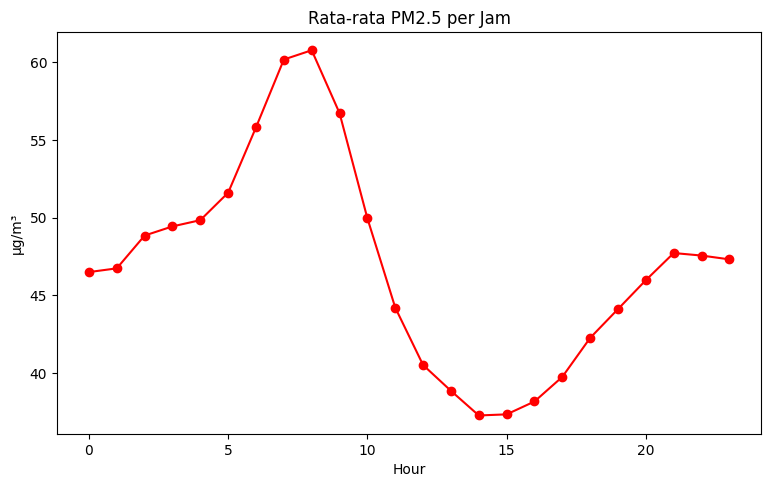

In [ ]:
plt.figure(figsize=(20, 24))
#Pola Harian Polutan
plt.subplot(4, 2, 4)
pm25_hourly = df.groupby('Hour')['PM2.5 (ug/m3)'].mean()
pm25_hourly.plot(marker='o', color='red')
plt.title('Rata-rata PM2.5 per Jam')
plt.ylabel('µg/m³')

Konsentrasi PM2.5 memiliki pola diurnal yang kuat, dengan puncak pada pagi hari (08:00) dan penurunan saat siang hingga sore, diikuti kenaikan signifikan pada malam hari. Hal ini menunjukkan adanya pengaruh signifikan dari aktivitas manusia dan kondisi cuaca terhadap kualitas udara. Jam (Hour) merupakan fitur penting untuk menganalisis dan memprediksi tingkat polusi udara.

Text(0.5, 1.0, 'Suhu vs Kelembaban Relatif')

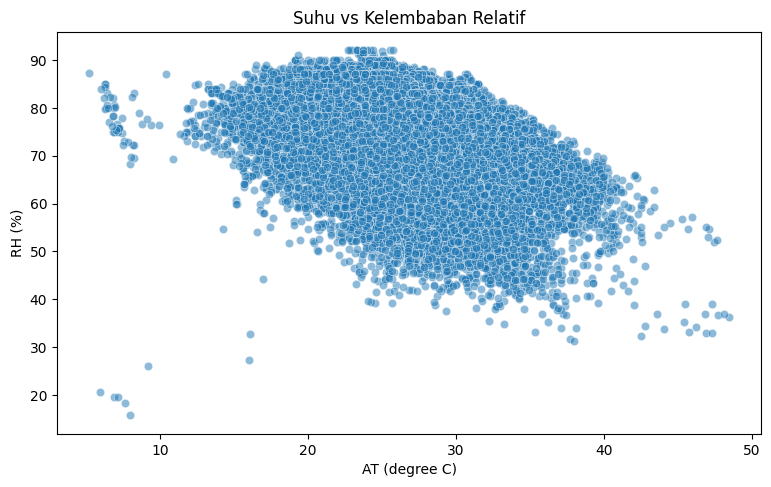

In [ ]:
#Scplot Suhu vs Kelembaban
plt.figure(figsize=(20, 24))
plt.subplot(4, 2, 6)
sns.scatterplot(data=df, x='AT (degree C)', y='RH (%)', alpha=0.5)
plt.title('Suhu vs Kelembaban Relatif')

korelasi negatif yang kuat antara suhu udara (AT) dan kelembaban relatif (RH). Ketika suhu meningkat, kelembaban cenderung menurun, dan sebaliknya. Hubungan ini mencerminkan dinamika termodinamika udara dan menunjukkan bahwa RH adalah prediktor penting untuk AT, atau sebaliknya. Pola ini juga mendukung hasil analisis korelasi sebelumnya yang menunjukkan korelasi -0.39 antara AT dan RH.

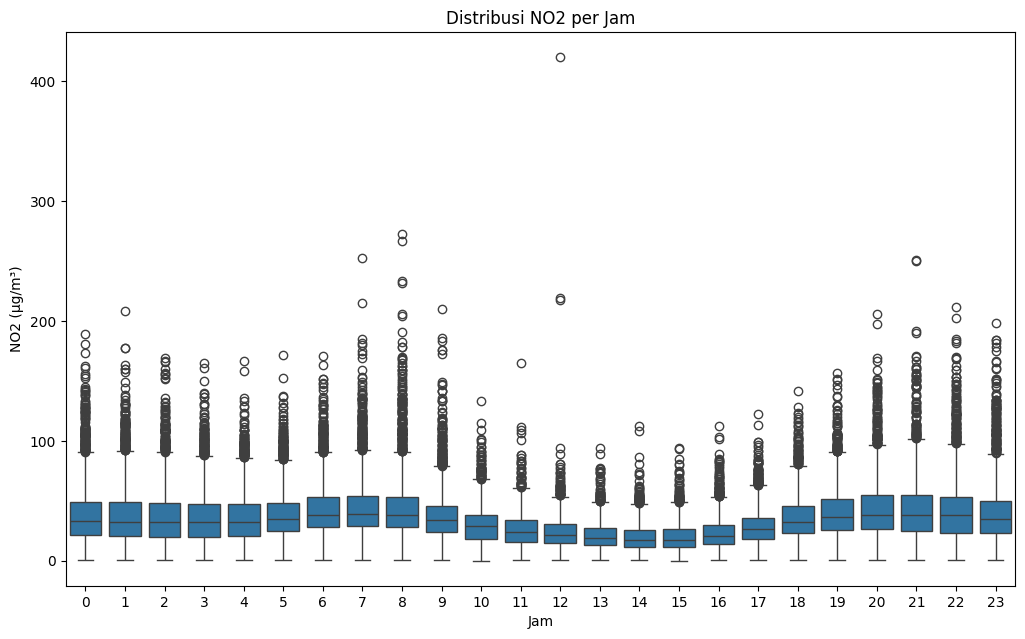

In [ ]:
# 7. Boxplot Polutan per Jam
plt.figure(figsize=(20, 24))
plt.subplot(4, 2, 7)
sns.boxplot(data=df, x='Hour', y='NO2 (ug/m3)')
plt.title('Distribusi NO2 per Jam')
plt.xlabel('Jam')
plt.ylabel('NO2 (µg/m³)')

plt.tight_layout()
plt.show()

Konsentrasi NO₂ menunjukkan pola harian yang khas, dengan kenaikan signifikan pada jam sibuk pagi (sekitar jam 8), penurunan saat siang hari, dan kenaikan kembali menjelang malam. Ini menunjukkan bahwa emisi NO₂ sangat dipengaruhi oleh aktivitas manusia dan kondisi atmosfer harian. Distribusi per jam ini penting untuk perencanaan kontrol polusi udara, serta sebagai fitur penting dalam prediksi kualitas udara.

#B

## Preprocessing

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
df = df.drop(columns=['From Date', 'To Date'])
df

,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),Ozone (ug/m3),Benzene (ug/m3),...,WD (degree),SR (W/mt2),BP (mmHg),VWS (m/s),AT (degree C),RF (mm),Xylene (ug/m3),Hour,Day,Month
0,50.00,91.75,3.33,27.70,17.48,NaN,24.35,1.33,NaN,0.58,...,285.50,6.75,737.0,0.03,26.30,0.00,0.65,0,1,7
1,30.75,59.25,1.20,20.78,11.40,0.03,8.23,1.77,NaN,0.45,...,299.50,6.75,736.0,0.05,25.00,1.50,0.50,1,1,7
2,NaN,NaN,1.17,4.07,2.73,0.10,10.77,1.20,NaN,0.53,...,285.67,6.67,736.0,0.03,24.17,0.33,0.43,2,1,7
3,8.00,NaN,2.58,6.38,5.30,NaN,19.78,1.58,144.42,0.75,...,302.50,6.00,735.0,0.08,24.10,0.00,0.63,3,1,7
4,33.25,NaN,5.30,21.03,15.47,0.15,22.40,2.25,42.65,0.78,...,297.25,6.00,735.0,0.08,24.90,0.00,0.67,4,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19,31,3
50396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,31,3
50397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,31,3
50398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22,31,3


kita drop kolom 'From Date' dan 'To Date' karena kurang relevan untuk analisis selanjutnya

### Handling Missing Value

In [ ]:
#Handling missing value
# Impute missing values using median
df_numeric = df.select_dtypes(include='number')
df[df_numeric.columns] = df_numeric.fillna(df_numeric.median())

In [ ]:
#Missing Values Analysis
missing_percent = df.isnull().mean() * 100
print(missing_percent.sort_values(ascending=False))

PM2.5 (ug/m3)      0.0
PM10 (ug/m3)       0.0
NO (ug/m3)         0.0
NO2 (ug/m3)        0.0
NOx (ppb)          0.0
NH3 (ug/m3)        0.0
SO2 (ug/m3)        0.0
CO (mg/m3)         0.0
Ozone (ug/m3)      0.0
Benzene (ug/m3)    0.0
Toluene (ug/m3)    0.0
Temp (degree C)    0.0
RH (%)             0.0
WS (m/s)           0.0
WD (degree)        0.0
SR (W/mt2)         0.0
BP (mmHg)          0.0
VWS (m/s)          0.0
AT (degree C)      0.0
RF (mm)            0.0
Xylene (ug/m3)     0.0
Hour               0.0
Day                0.0
Month              0.0
dtype: float64


kita cek sudah tidak ada missing value lagi di semua kolom

In [ ]:
numeric_cols = df.select_dtypes(include='number').columns

for col in numeric_cols:
    count = (df[col] < 0).sum()
    print(f"{col}: {count}")


PM2.5 (ug/m3): 0
PM10 (ug/m3): 0
NO (ug/m3): 0
NO2 (ug/m3): 0
NOx (ppb): 0
NH3 (ug/m3): 0
SO2 (ug/m3): 0
CO (mg/m3): 0
Ozone (ug/m3): 0
Benzene (ug/m3): 0
Toluene (ug/m3): 0
Temp (degree C): 0
RH (%): 0
WS (m/s): 0
WD (degree): 0
SR (W/mt2): 0
BP (mmHg): 0
VWS (m/s): 7640
AT (degree C): 0
RF (mm): 0
Xylene (ug/m3): 0
Hour: 0
Day: 0
Month: 0


Disini kita mengecek apakah ada nilai negatif di setiap kolom numerik dalam dataset, dan ternyata ada di kolom VWS

In [ ]:
df['VWS (m/s)'] = df['VWS (m/s)'].abs()

kita absolutkan semua nilai yang ada di kolom VWS menjadi positif semua

In [ ]:
import numpy as np

# Ambil index dari kolom target
target_idx = df.columns.get_loc("AT (degree C)")

# Fungsi untuk membuat windowed dataset
def make_windowed_data(array, window):
    X_list = []
    y_list = []
    total = len(array) - window
    for i in range(total):
        window_slice = array[i:i + window]
        target_value = array[i + window][target_idx]
        X_list.append(window_slice)
        y_list.append(target_value)
    return np.array(X_list), np.array(y_list)

# Set ukuran jendela waktu
win_size = 5

# Buat input (X) dan target (y)
X, y = make_windowed_data(df.values, win_size)

# Tampilkan bentuk data
print("X shape:", X.shape)  # (jumlah sampel, panjang window, jumlah fitur)
print("y shape:", y.shape)  # (jumlah sampel,)


X shape: (50395, 5, 24)
y shape: (50395,)


 membentuk dataset time series untuk model LSTM, di mana setiap input (X) berisi 5 langkah waktu ke belakang(sesuai dengan soal diminta untuk menggunakan data di 5 jam sebelumnya) dengan 24 fitur, dan output (y) adalah suhu udara (AT) pada langkah berikutnya

### Split Data

In [ ]:
# Tentukan proporsi data
total_samples = len(X)
train_end = int(0.8 * total_samples)
val_end = int(0.9 * total_samples)  # 80% + 10%

# Bagi data menjadi train, validation, dan test
X_train, y_train = X[:train_end], y[:train_end]
X_val, y_val     = X[train_end:val_end], y[train_end:val_end]
X_test, y_test   = X[val_end:], y[val_end:]


membagi data menjadi 80% training, 10% validasi, dan 10% testing

- Training = train_end = 80%
- Validation = val_end - train_end = 10%
- Testing = total - val_end = 10%

### Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Langkah 1: Ubah data dari 3D (samples, timesteps, features) → 2D
def flatten_3d(X):
    return X.reshape(-1, X.shape[2])

X_tr_flat = flatten_3d(X_train)
X_val_flat = flatten_3d(X_val)
X_test_flat = flatten_3d(X_test)

# Langkah 2: Lakukan normalisasi Min-Max
scaler = MinMaxScaler()
X_tr_scaled = scaler.fit_transform(X_tr_flat)
X_val_scaled = scaler.transform(X_val_flat)
X_test_scaled = scaler.transform(X_test_flat)

# Langkah 3: Kembalikan bentuk ke 3D
def reshape_back(X_scaled, original_shape):
    return X_scaled.reshape(original_shape)

X_train_scaled = reshape_back(X_tr_scaled, X_train.shape)
X_val_scaled = reshape_back(X_val_scaled, X_val.shape)
X_test_scaled = reshape_back(X_test_scaled, X_test.shape)


normalisasi Min-Max pada data X_train, X_val, dan X_test dengan langkah berikut:

1. Mengubah data dari 3D ke 2D agar bisa discaling ((samples × timesteps, features))

2. Melakukan scaling agar semua fitur berada di rentang 0 – 1

3. Mengembalikan data ke bentuk 3D agar bisa digunakan oleh model LSTM

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Ubah target jadi 2D agar bisa diskalakan
def reshape_target(y):
    return y.reshape(-1, 1)

y_tr = reshape_target(y_train)
y_vl = reshape_target(y_val)
y_ts = reshape_target(y_test)

# Inisialisasi scaler dan fit-transform ke data training
scaler_y = MinMaxScaler()
y_tr_scaled = scaler_y.fit_transform(y_tr)
y_vl_scaled = scaler_y.transform(y_vl)
y_ts_scaled = scaler_y.transform(y_ts)

# Simpan hasil kembali ke variabel semula (optional)
y_train, y_val, y_test = y_tr_scaled, y_vl_scaled, y_ts_scaled


# C

## BASELINE MODEL

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Tentukan dimensi input
seq_length = X.shape[1]       # panjang urutan (timesteps)
feature_count = X.shape[2]    # jumlah fitur sensor
units = 10                    # ukuran hidden layer

# Buat model
model = Sequential()
model.add(LSTM(units, input_shape=(seq_length, feature_count)))
model.add(Dense(1, activation='linear'))  # Output 1 nilai (regresi)

# Compile model
model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['mean_absolute_error']
)

# Tampilkan ringkasan arsitektur
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_5 (LSTM)                   │ (None, 10)             │         1,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,411 (5.51 KB)

 Trainable params: 1,411 (5.51 KB)

 Non-trainable params: 0 (0.00 B)

Model yang dibangun merupakan model LSTM sederhana untuk regresi dengan arsitektur 2 lapis: satu layer LSTM dengan 10 unit (hidden state) dan satu layer Dense sebagai output yang menghasilkan 1 nilai prediksi (yaitu suhu udara atau AT). Input model berupa data time series multivariat dengan dimensi (timesteps, fitur sensor) sesuai struktur X. Model dikompilasi menggunakan optimizer Adam, dengan loss function mean_squared_error dan metrik evaluasi mean_absolute_error. Total parameter yang dapat dilatih adalah 1.411, yang relatif ringan, cocok untuk baseline model time series forecasting.

In [ ]:
# Training model dengan data training dan validasi
history = model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=32,
    verbose=1  # Tampilkan progress per epoch
)


Epoch 1/20
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 67s 4ms/step - loss: 0.0170 - mean_absolute_error: 0.0936 - val_loss: 0.0090 - val_mean_absolute_error: 0.0787
Epoch 2/20
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0064 - mean_absolute_error: 0.0610 - val_loss: 0.0080 - val_mean_absolute_error: 0.0747
Epoch 3/20
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0061 - mean_absolute_error: 0.0602 - val_loss: 0.0079 - val_mean_absolute_error: 0.0760
Epoch 4/20
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0055 - mean_absolute_error: 0.0566 - val_loss: 0.0045 - val_mean_absolute_error: 0.0525
Epoch 5/20
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0034 - mean_absolute_error: 0.0403 - val_loss: 0.0023 - val_mean_absolute_error: 0.0350
Epoch 6/20
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0024 - mean_absolute_error: 0.0311 - val_loss: 0.0017 - val_mean_absolute_error: 0.0291
Epoch 7/20
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.0020 - mean_absolute_er

Dari hasil output training model baseline LSTM selama 20 epoch ini, terlihat bahwa model mengalami proses pembelajaran yang sangat baik dan stabil. Pada epoch pertama, nilai loss sebesar 0.0170 dan val_loss sebesar 0.0090 menunjukkan perbedaan yang cukup besar antara performa di data latih dan data validasi. Namun, seiring berjalannya epoch, baik loss maupun val_loss turun secara signifikan dan konsisten, mengindikasikan bahwa model mampu belajar dari data tanpa mengalami overfitting.

Nilai mean_absolute_error (MAE) juga menunjukkan penurunan yang konsisten dari sekitar 0.0936 di awal menjadi sekitar 0.0224 di akhir training untuk data latih, dan dari 0.0787 menjadi sekitar 0.0213 untuk data validasi. Hal ini menunjukkan bahwa model tidak hanya mampu mengurangi kesalahan pada data latih, tetapi juga mempertahankan performa yang baik terhadap data yang tidak terlihat sebelumnya (validation set).

Penurunan loss dan MAE yang signifikan selama 5 – 10 epoch pertama, kemudian mulai stagnan pada epoch-epoch selanjutnya, menunjukkan bahwa model mencapai konvergensi cukup cepat. Setelah sekitar epoch ke-13, val_loss stabil di angka sekitar 9e-4, yang artinya sangat kecil — menandakan performa prediktif yang baik.

Kesimpulannya, model baseline LSTM ini menunjukkan hasil yang sangat baik untuk regresi, dengan kesalahan absolut rata-rata (MAE) akhir di validation set sekitar 0.0213, menandakan prediksi model yang cukup akurat dan generalisasi yang baik.

# D

## MODIFIED MODEL

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Inisialisasi model
model_mod = Sequential()

# Layer LSTM pertama (return_sequences=True agar output bisa ke LSTM kedua)
model_mod.add(LSTM(units=32, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))

# Layer LSTM kedua
model_mod.add(LSTM(units=16))

# Output layer untuk regresi
model_mod.add(Dense(1, activation='linear'))

# Kompilasi model dengan optimizer Adam
optimizer = Adam(learning_rate=0.001)
model_mod.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

# Callback early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)




/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


membangun sebuah model LSTM yang lebih kompleks (modified model) untuk regresi time series multivariat. Model terdiri dari dua lapis LSTM berurutan: LSTM pertama memiliki 32 unit dan mengembalikan urutan output (return_sequences=True), sehingga dapat diteruskan ke LSTM kedua dengan 16 unit. Setelah itu, hasilnya diteruskan ke layer Dense output dengan 1 neuron dan aktivasi linear, untuk memprediksi nilai kontinu seperti suhu udara (AT).

 Model ini dikompilasi dengan optimizer Adam (learning rate 0.001), dan menggunakan mean squared error (MSE) sebagai fungsi loss serta mean absolute error (MAE) sebagai metrik evaluasi. Callback EarlyStopping digunakan untuk menghentikan training lebih awal jika val_loss tidak membaik selama 5 epoch, dan otomatis mengembalikan bobot terbaik.

In [ ]:
# Proses pelatihan
history_mod = model_mod.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/50
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.0070 - mae: 0.0606 - val_loss: 0.0047 - val_mae: 0.0543
Epoch 2/50
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0040 - mae: 0.0465 - val_loss: 0.0029 - val_mae: 0.0426
Epoch 3/50
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.0031 - mae: 0.0405 - val_loss: 0.0022 - val_mae: 0.0354
Epoch 4/50
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.0020 - mae: 0.0306 - val_loss: 0.0012 - val_mae: 0.0248
Epoch 5/50
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.0013 - mae: 0.0237 - val_loss: 8.1942e-04 - val_mae: 0.0197
Epoch 6/50
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.0011 - mae: 0.0209 - val_loss: 8.1120e-04 - val_mae: 0.0196
Epoch 7/50
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.0012 - mae: 0.0209 - val_loss: 8.1919e-04 - val_mae: 0.0205
Epoch 8/50
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0010 - mae: 0.0195 - val_loss: 6.8359e-04 - val_mae: 0.0175
Epoch 9/50
1260/1260

Hasil pelatihan model LSTM yang telah dimodifikasi menunjukkan peningkatan performa yang signifikan dibandingkan model baseline. Pada epoch pertama, model sudah memulai dengan nilai loss dan val_loss yang lebih rendah, masing-masing sebesar 0.0070 dan 0.0047, serta mean absolute error (MAE) validasi sebesar 0.0543. Seiring berjalannya epoch, baik loss maupun val_loss menurun dengan cepat dan stabil, bahkan telah mencapai angka di bawah 0.001 hanya dalam 5 hingga 6 epoch. Pada epoch ke-13, val_loss telah turun ke angka 7.4e-4 dan val_mae menyentuh 0.0179, yang berarti lebih rendah dibandingkan model baseline yang sebelumnya memiliki val_mae akhir sebesar 0.0213. Penurunan ini menunjukkan bahwa model dimodifikasi dengan baik sehingga mampu belajar pola data secara lebih efisien dan akurat. Selain itu, tidak terdapat tanda-tanda overfitting, karena performa validasi tetap konsisten hingga epoch ke-13. Jadi, modifikasi yang dilakukan pada model LSTM berhasil meningkatkan kemampuan generalisasi dan keakuratannya, menjadikannya lebih unggul dibandingkan versi baseline model

# E

## EVALUATE MODEL

### MSE, MAE BASELINE MODEL

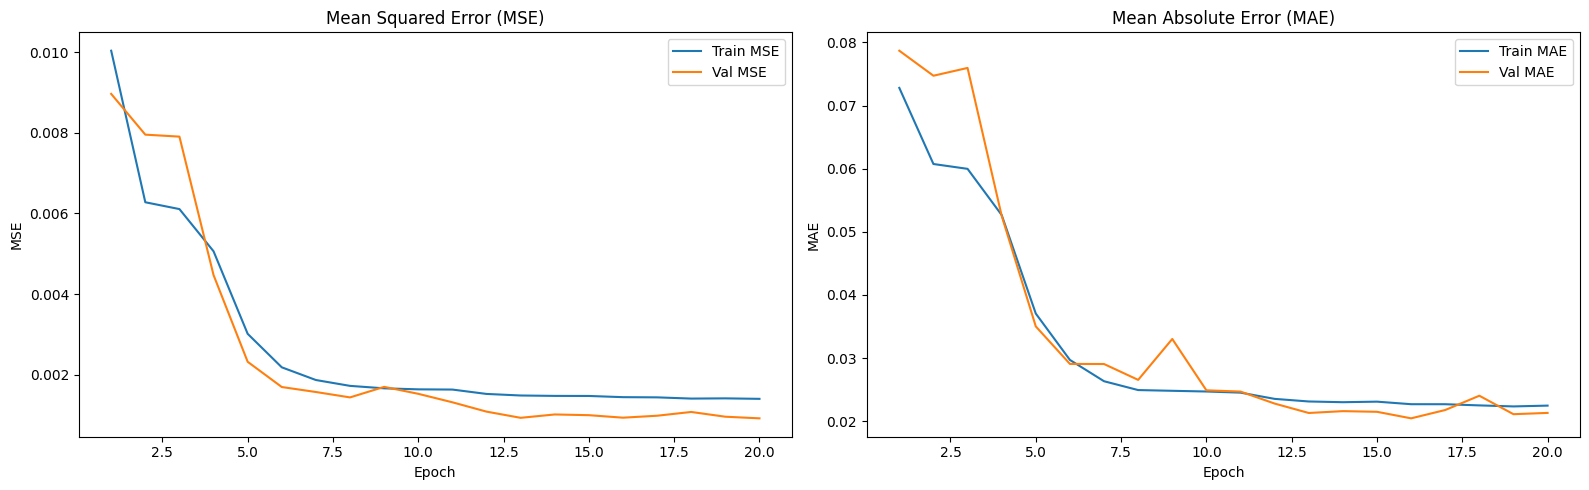

In [ ]:
import matplotlib.pyplot as plt

# Siapkan sumbu epoch
epochs = range(1, len(history.history['loss']) + 1)

# Buat canvas dengan 2 subplot (MSE & MAE)
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

# === Plot Loss (MSE) ===
axs[0].plot(epochs, history.history['loss'], label='Train MSE')
axs[0].plot(epochs, history.history['val_loss'], label='Val MSE')
axs[0].set_title('Mean Squared Error (MSE)')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('MSE')
axs[0].legend()

# === Plot MAE ===
axs[1].plot(epochs, history.history['mean_absolute_error'], label='Train MAE')
axs[1].plot(epochs, history.history['val_mean_absolute_error'], label='Val MAE')
axs[1].set_title('Mean Absolute Error (MAE)')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('MAE')
axs[1].legend()

plt.tight_layout()
plt.show()

 Nilai Mean Squared Error (MSE) dan Mean Absolute Error (MAE) pada data latih dan validasi mengalami penurunan yang konsisten selama 20 epoch pertama. Pada awalnya, terdapat gap antara train dan validation error, tetapi keduanya segera menyatu mulai sekitar epoch ke-5 dan terus menurun secara stabil. Setelah epoch ke-10, nilai MSE dan MAE cenderung stagnan di titik rendah, menunjukkan bahwa model telah mencapai konvergensi tanpa tanda-tanda overfitting. Jadi menandakan kalau baseline model LSTM memiliki kemampuan generalisasi yang cukup baik dengan kesalahan prediksi yang rendah pada data validasi.

### MSE, MAE MODIFIED MODEL

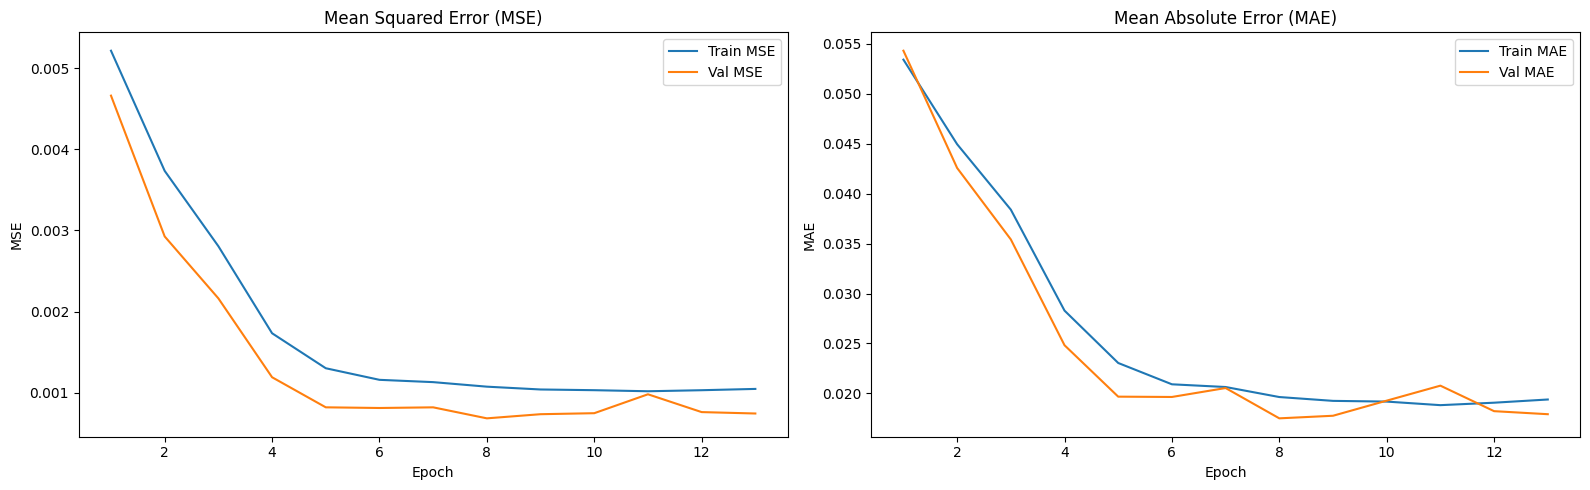

In [ ]:
import matplotlib.pyplot as plt

# Siapkan sumbu epoch berdasarkan panjang training history
epochs_mod = range(1, len(history_mod.history['loss']) + 1)

# Buat canvas dengan 2 subplot berdampingan
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

# === Plot MSE (Loss) ===
axs[0].plot(epochs_mod, history_mod.history['loss'], label='Train MSE')
axs[0].plot(epochs_mod, history_mod.history['val_loss'], label='Val MSE')
axs[0].set_title('Mean Squared Error (MSE)')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('MSE')
axs[0].legend()

# === Plot MAE ===
axs[1].plot(epochs_mod, history_mod.history['mae'], label='Train MAE')
axs[1].plot(epochs_mod, history_mod.history['val_mae'], label='Val MAE')
axs[1].set_title('Mean Absolute Error (MAE)')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('MAE')
axs[1].legend()

# Tata letak agar tidak saling tumpang tindih
plt.tight_layout()
plt.show()


 Dari grafik MSE (kiri), terlihat bahwa nilai error menurun secara konsisten, menunjukkan proses pembelajaran yang stabil. Validation MSE mencapai titik rendah sejak epoch ke-6 dan stabil setelahnya, yang berarti model telah menemukan pola dengan baik tanpa overfitting. Grafik MAE (kanan) juga menunjukkan penurunan yang sama, di mana nilai MAE validation bahkan lebih rendah dibanding training di beberapa titik akhir, yang merupakan indikasi positif. Kesimpulannya, modified model berhasil belajar secara efektif, dengan performa yang baik dan generalisasi yang stabil

### MSE, MAE, R2 Score

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def print_evaluation_results(model, X_data, y_true, label="Model"):
    y_pred = model.predict(X_data)

    mse_val = mean_squared_error(y_true, y_pred)
    mae_val = mean_absolute_error(y_true, y_pred)
    r2_val = r2_score(y_true, y_pred)

    print(f"{label} - MSE: {mse_val:.4f}, MAE: {mae_val:.4f}, R²: {r2_val:.4f}")
    return mse_val, mae_val, r2_val

# Evaluasi untuk kedua model
baseline_metrics = print_evaluation_results(model, X_test, y_test, label="Baseline Model")
modified_metrics = print_evaluation_results(model_mod, X_test, y_test, label="Modified Model")

158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Baseline Model - MSE: 0.0009, MAE: 0.0210, R²: 0.9005
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Modified Model - MSE: 0.0005, MAE: 0.0160, R²: 0.9359


Hasil evaluasi model menunjukkan bahwa modified model LSTM memiliki kinerja yang lebih baik dibandingkan dengan baseline model. Pada data uji (test set), modified model mencatatkan nilai Mean Squared Error (MSE) sebesar 0.0005, Mean Absolute Error (MAE) sebesar 0.0160, dan skor R² sebesar 0.9359. Sementara itu, baseline model menghasilkan MSE sebesar 0.0009, MAE sebesar 0.0210, dan R² sebesar 0.9005. Ini berarti model yang dimodifikasi mampu melakukan prediksi suhu udara (AT) dengan tingkat kesalahan yang lebih rendah dan akurasi yang lebih tinggi, serta menjelaskan sekitar 93.6% variansi dalam data target, dibandingkan hanya 90% pada model dasar.

Jadi bisa dibilang kalau penambahan layer LSTM dan peningkatan arsitektur dalam modified model memberikan dampak positif terhadap kemampuan model dalam menangkap pola data time series yang kompleks.

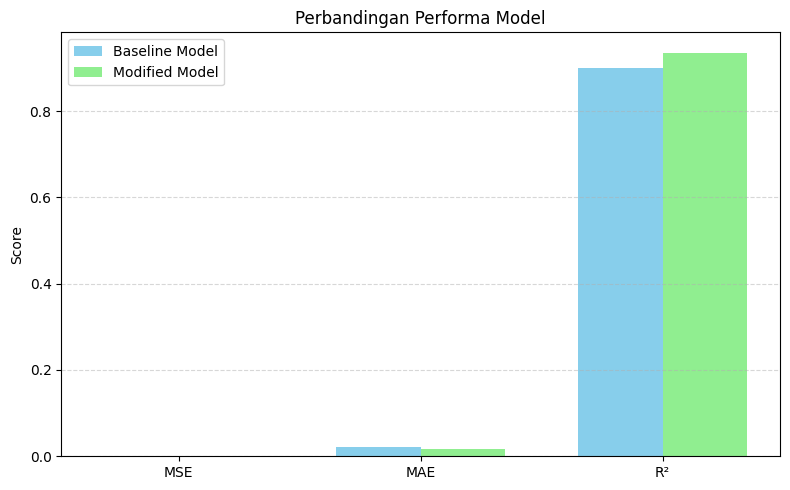

In [ ]:
# Persiapkan data untuk plot
labels = ['MSE', 'MAE', 'R²']
baseline_vals = baseline_metrics
modified_vals = modified_metrics
x = np.arange(len(labels))  # posisi x untuk setiap metrik

# Plot
width = 0.35
plt.figure(figsize=(8, 5))
plt.bar(x - width/2, baseline_vals, width, label='Baseline Model', color='skyblue')
plt.bar(x + width/2, modified_vals, width, label='Modified Model', color='lightgreen')

# Label dan judul
plt.ylabel('Score')
plt.title('Perbandingan Performa Model')
plt.xticks(x, labels)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

MAE & MSE lebih kecil = prediksi lebih dekat ke nilai asli, artinya model lebih akurat.

R² Score mendekati 1 = semakin baik model menjelaskan variasi dari data.

 model yang telah dimodifikasi memiliki performa yang lebih baik dibandingkan baseline. Hal ini terlihat dari nilai MSE dan MAE yang lebih rendah, serta nilai R² yang lebih tinggi. Jadi bisa disimpulkan, model modifikasi tidak hanya menghasilkan prediksi dengan kesalahan yang lebih kecil, tetapi juga mampu menjelaskan variasi data target secara lebih baik

# F

link video drive penjelasan no 1 :

https://drive.google.com/file/d/1Os-3jMrk9eEef6YSsC3sufeQu6x8K5Z5/view?usp=sharing

# G

**Pertanyaan Bonus, apakah problem ini mungkin menggunakan time series
multivariate, bagaimana mengetahui apakah problem tersebut dapat menjadi multivariate, jelaskan jawaban
anda untuk problem ini?**


---



Problem yang diberikan merupakan kasus prediksi suhu udara lingkungan atau Air Temperature (AT) berdasarkan data historis kualitas udara yang tercatat secara berkala. Karena data terdiri dari banyak variabel sensor seperti NO₂, CO, kelembaban (RH), sinar matahari (Global Radiation), serta AT itu sendiri, dan semua fitur tersebut berubah seiring waktu, maka problem ini dikategorikan sebagai multivariate time series regression.

Kita tidak hanya menggunakan nilai historis dari AT untuk memprediksi nilai di masa depan, tetapi juga menggabungkan informasi dari berbagai fitur lingkungan lain yang memiliki pola temporal. Hal ini terlihat jelas dari proses pra-pemrosesan data, di mana input X dibentuk dalam format tiga dimensi (samples, timesteps, features) — format standar untuk model LSTM multivariate.

Selama proses pelatihan, model juga menggunakan banyak fitur pada setiap timestep untuk belajar mengenali pola yang memengaruhi AT di waktu berikutnya. Oleh karena itu, dengan mempertimbangkan jumlah fitur input, struktur data, serta jenis model yang digunakan (LSTM dengan input multi-fitur per timestep), maka dapat disimpulkan bahwa ini adalah problem time series multivariat, bukan univariat.